# Project Name - IRIS Flowers Classification

## Project Summary -

#### Project Description:

The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

#### Objective:

The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

#### Key Project Details:

• Iris flowers have three species: setosa, versicolor, and virginica.

• These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.

• The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.

• The trained model will classify iris flowers into one of the three species based on their measurements.

## GitHub Link -

## Problem Statement

 The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

### Objective:

The objective of this project is to develop a machine learning model capable of learning from the measurements of iris flowers and accurately classifying them into their respective species. The model's primary goal is to automate the classification process based on the distinct characteristics of each iris species.

### Project Details:

• Dataset includes sepal and petal length/width measurements for different species.

• Identify the most significant features influencing flower species classification. 

• Evaluate model performance using appropriate techniques.

• Expected outcome: A machine learning model with high species identification accuracy. 

# Start the project

### Dataset loading

In [62]:
import pandas as pd
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Checking null value

In [65]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Information

In [68]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### descriptive statistics

In [71]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Feature Engineering

### Categorical Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Transform the 'species' column
df['species'] = le.fit_transform(df['species'])

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


### Data Scaling

In [78]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('species', axis=1)
y = df['species']


### Data Splitting

In [81]:
# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### DecisionTreeClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Limit depth
dt_model = DecisionTreeClassifier(max_depth=4, random_state=32)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(max_depth=4, random_state=32)

### RandomForestClassifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

### LogisticRegression

In [118]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=150)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=150)

### Predictions

In [93]:
yrf_predict=lr_model.predict(X_test)
yrf_predict

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

### evaluation techniques  -- Accuracy for random forest

In [96]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,yrf_predict)
accuracy

0.9666666666666667

### evaluation techniques -- confusion matrix for random forest

In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yrf_predict)
cm

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]], dtype=int64)

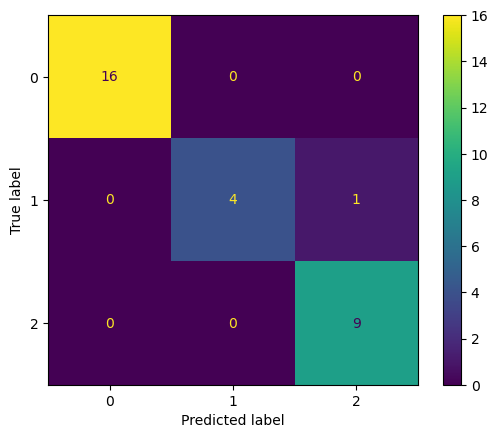

In [101]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
matrix=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
matrix.plot()

### Some Evaluation techniques

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yrf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



## Data Vizualization

### Distribution of Numerical Variables

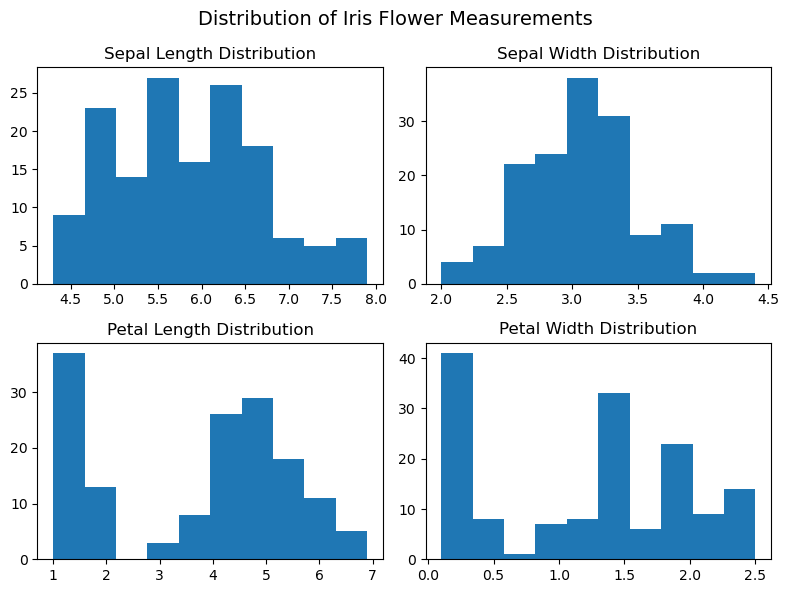

In [135]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

### Correlation Heatmap

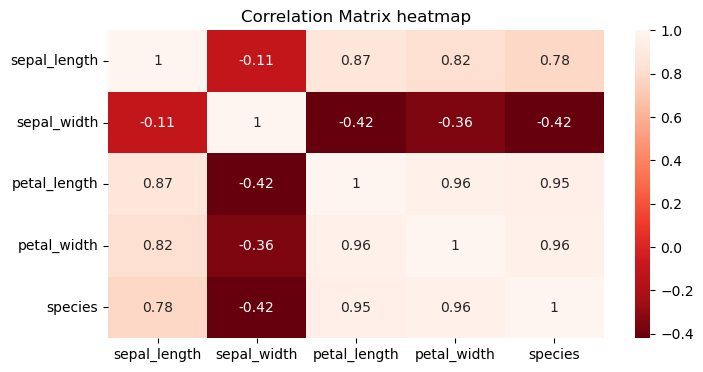

In [147]:
#Correlation Heatmap Visualization Code
corr_matrix = df.corr()

#Plot Heatmap
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

#Setting Labels
plt.title('Correlation Matrix heatmap')

#Display Chart
plt.show()